<a href="https://colab.research.google.com/github/SKawsar/Data_Visualization_with_Python_s2/blob/main/Lecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explanatory Data Analysis for audi's dataset by Audity Ghosh


#### Import required libraries and packages

In [4]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### Read a csv file as pandas DataFrame

In [5]:
df = pd.read_csv("audi.csv")

print(type(df))
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,47.9,1.4


#### Check for missing values, data types of the columns

In [6]:
df.info()

# Nan - not a number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


## So the Catagorical attributes are model, transmission and fuelType

In [7]:
print(df.shape)

print("number of rows = ", df.shape[0])
print("number of columns = ", df.shape[1])

(10668, 8)
number of rows =  10668
number of columns =  8


# Analysis for "fuelType" column

# Count the number of unique values present in the 'fuelType' column

In [8]:
print(df["fuelType"].value_counts())

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64


# Pie Chart for 'fuelType' column

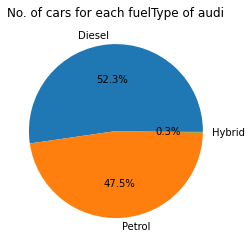

In [9]:
df["fuelType"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.ylabel("")
plt.title('No. of cars for each fuelType of audi', loc='left')
plt.show()

### The "Pie chart for fuelType column" is a bad visualization because <br> - Though we have 3 classes for the pie chart which is an ideal case but it is difficult to differentiate the part of 0.3% of Hybrid class.

# Find the percentage of unique values present in the 'fuelType' column

In [10]:
print(df["fuelType"].value_counts())

print(type(df["fuelType"].value_counts()))

df_fuelType = pd.DataFrame(df["fuelType"].value_counts())

display(df_fuelType.head())
print(df_fuelType.index)
print(df_fuelType.columns)

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64
<class 'pandas.core.series.Series'>


,fuelType
Diesel,5577
Petrol,5063
Hybrid,28


Index(['Diesel', 'Petrol', 'Hybrid'], dtype='object')
Index(['fuelType'], dtype='object')


In [11]:
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})

df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100

df_fuelType = df_fuelType.round(2)

# df_fuelType = np.round(df_fuelType, 2)

display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Diesel,5577,52.28
1,Petrol,5063,47.46
2,Hybrid,28,0.26


# Create a Barplot for the 'fuelType' column

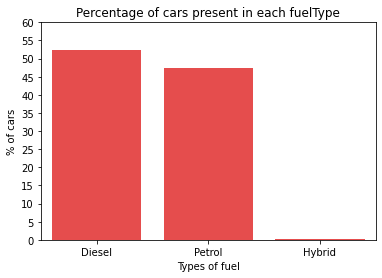

In [12]:
sns.barplot(x="fuelType", 
            y="% of cars", 
            data=df_fuelType, 
            color="red",
            alpha=0.8)

plt.xlabel("Types of fuel")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each fuelType")

plt.yticks(np.arange(0,61,5))

plt.show()

### The "Barplot for fuelType column" is a good visualization because <br> - Both x-axis, y-axis labels are appropriate and values of each class is clear. 

## We can reach the conclusion that barplot is better for the visualization of "fuelType" attribute. Because values of each class is more clear in barplot. 

### Scatterplots for mileage vs price and mpg vs price

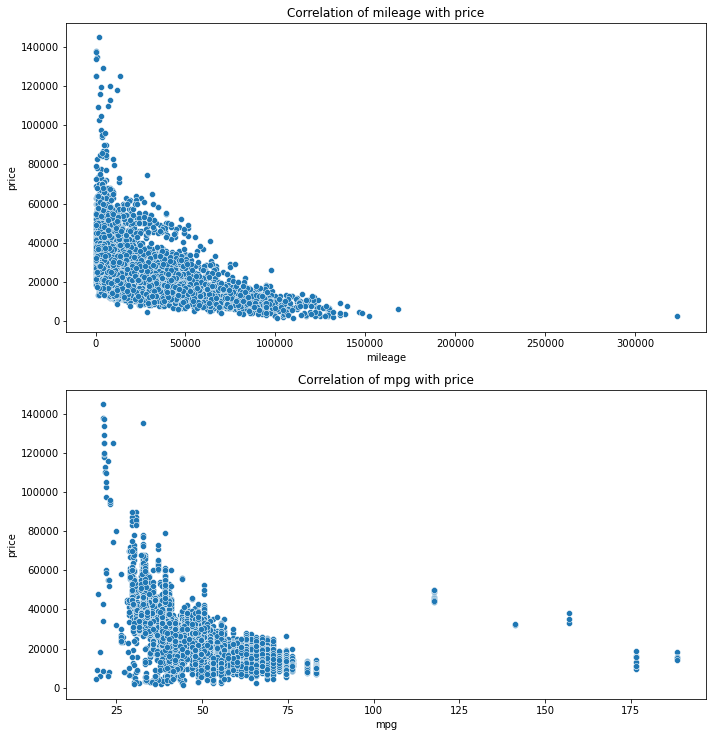

In [13]:
plt.figure(figsize=(10,15))

plt.subplot(3, 1, 1)
sns.scatterplot(x="mileage", y="price", data=df)
plt.title("Correlation of mileage with price")

plt.subplot(3, 1, 2)
sns.scatterplot(x="mpg", y="price", data=df)
plt.title("Correlation of mpg with price")


plt.tight_layout()
plt.show()

Here we can see a negative correlation for mileage with price, but cannot determine any relation for mpg with price

### Adding the hue parameter with the scatterplots

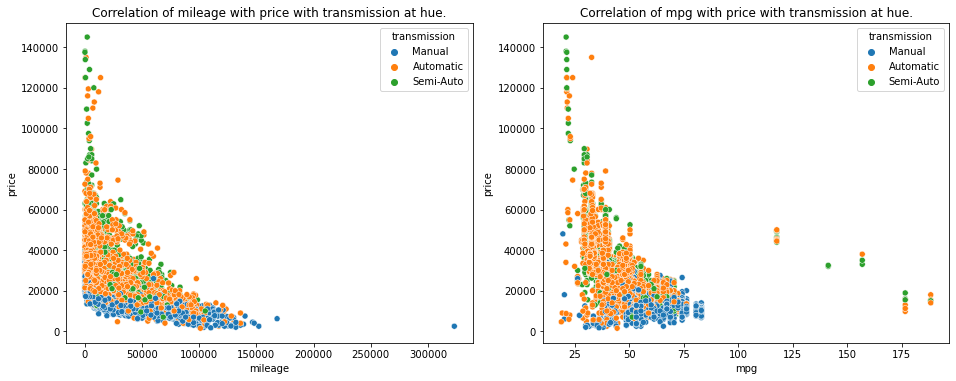

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue="transmission")
plt.title("Correlation of mileage with price with transmission at hue.")

plt.subplot(2, 3, 2)
sns.scatterplot(x="mpg", y="price", data=df, hue="transmission")
plt.title("Correlation of mpg with price with transmission at hue.")


plt.tight_layout()
plt.show()

Here for mileage-price, we can see most of the manual transmissioned cars have lower price than others.
<br> For mpg-price, we cannot determine specifically. 

### Regression plots for mileage and mpg with price

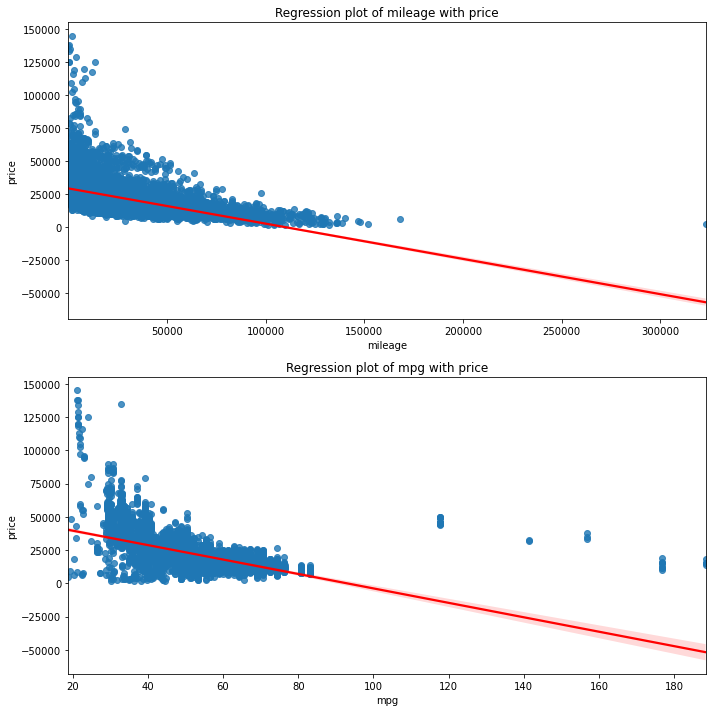

In [15]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
sns.regplot(x="mileage", y="price", data=df, line_kws={"color":"red"})
plt.title("Regression plot of mileage with price")

plt.subplot(2, 1, 2)
sns.regplot(x="mpg", y="price", data=df, line_kws={"color":"red"})
plt.title("Regression plot of mpg with price")


plt.tight_layout()
plt.show()

Both mileage and mpg with price are showing negative slope

### Pairplots for numeric columns

In [16]:
display(df.head())
print(df.info())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB
None


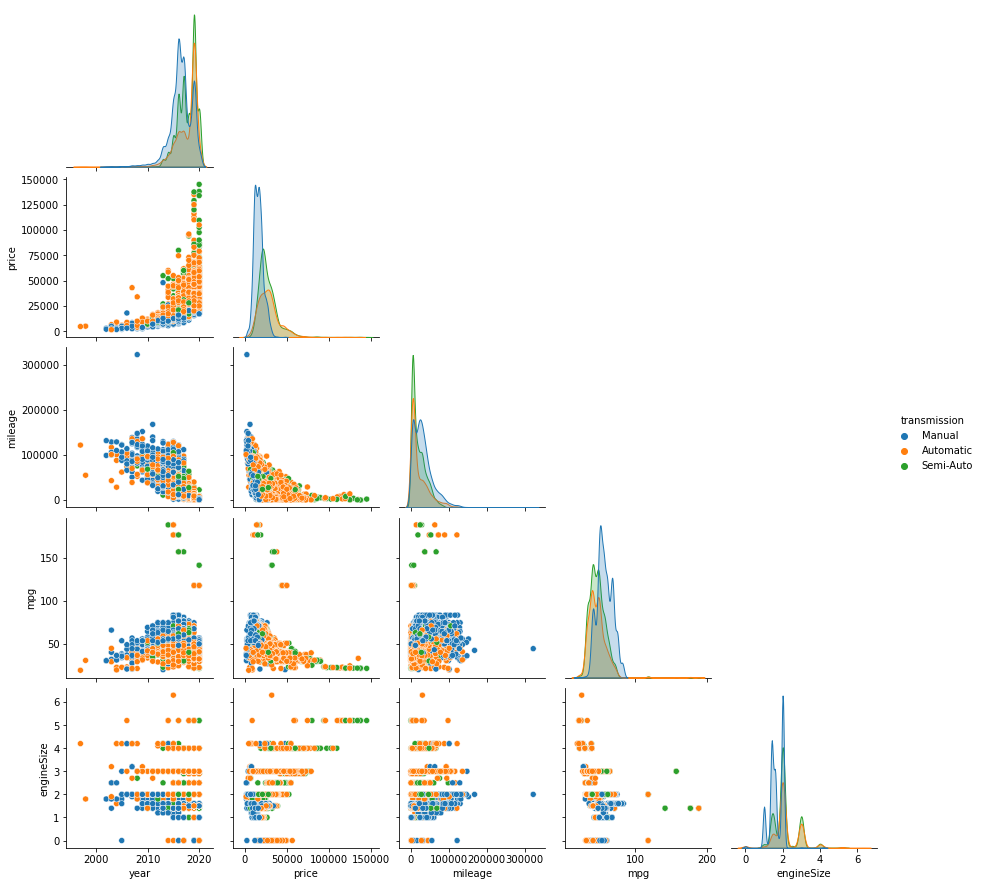

In [67]:
sns.pairplot(df, hue="transmission",corner=True) #corner=True removes redundant plots
plt.show()

Whether the car is recent or not, most of the manual transmissioned cars have lower price. 
<br>Here, price of one manual transmissioned car is too low in spite of having too much mileage.


#### Pairplot with only necessary plots.

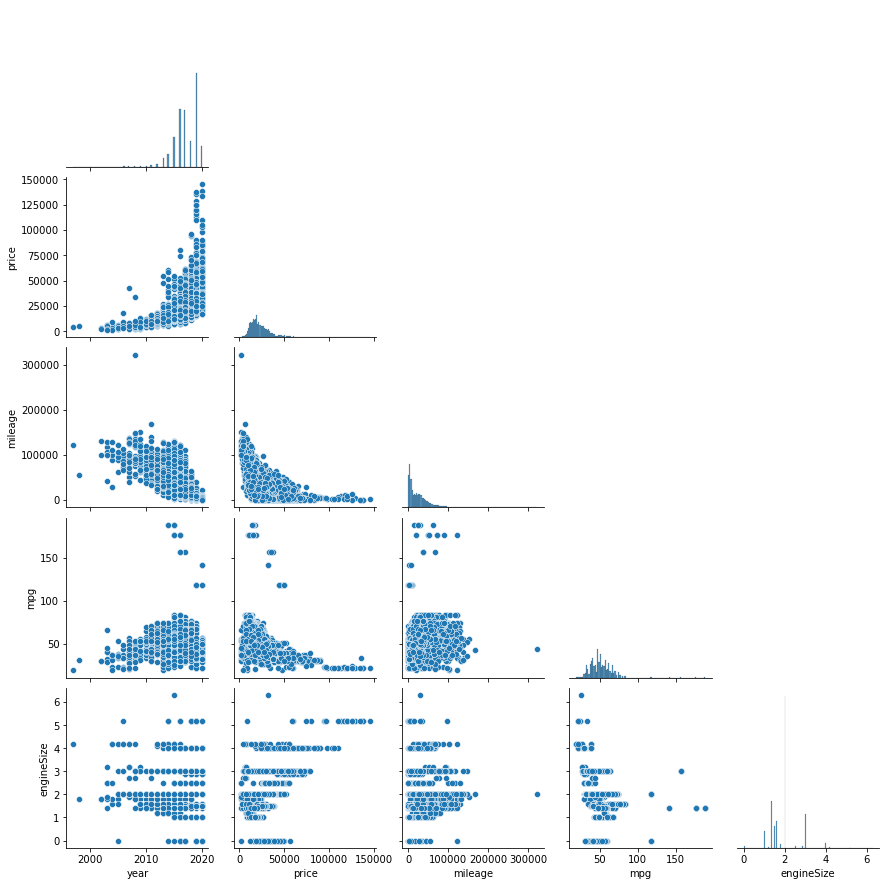

In [19]:
sns.pairplot(df, corner=True)

#### For pairplots of numeric columns, we found clear correlation between price-year and price-mileage

#### Adding categorical feature

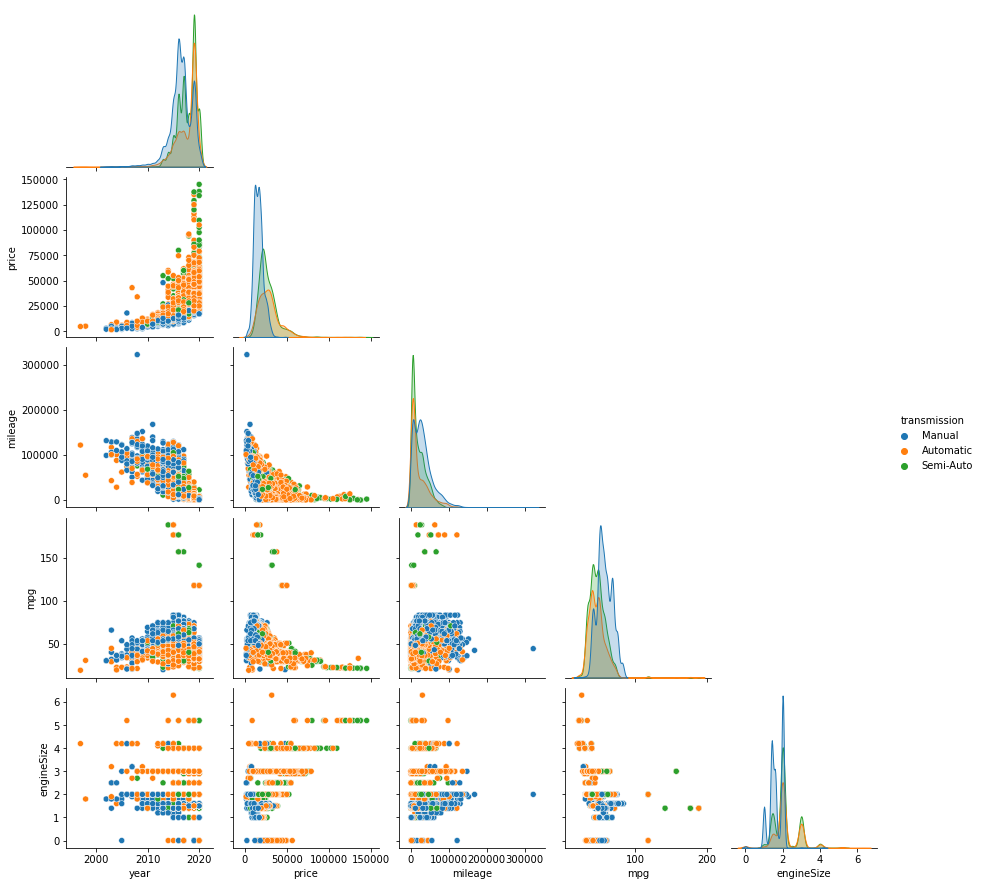

In [20]:
sns.pairplot(df, corner=True, hue="transmission")

#### Semi-auto transmissioned cars are recent and their prices are quite high compared to other transmission types.

#### Seperate the numerical columns of the dataset

In [21]:
num_cols = []

for col in df.columns:
    if df[col].dtypes != "O":
        num_cols.append(col)


print(num_cols)

['year', 'price', 'mileage', 'mpg', 'engineSize']


# Boxplot

#### Create a for loop to show the boxplots of all numeric features

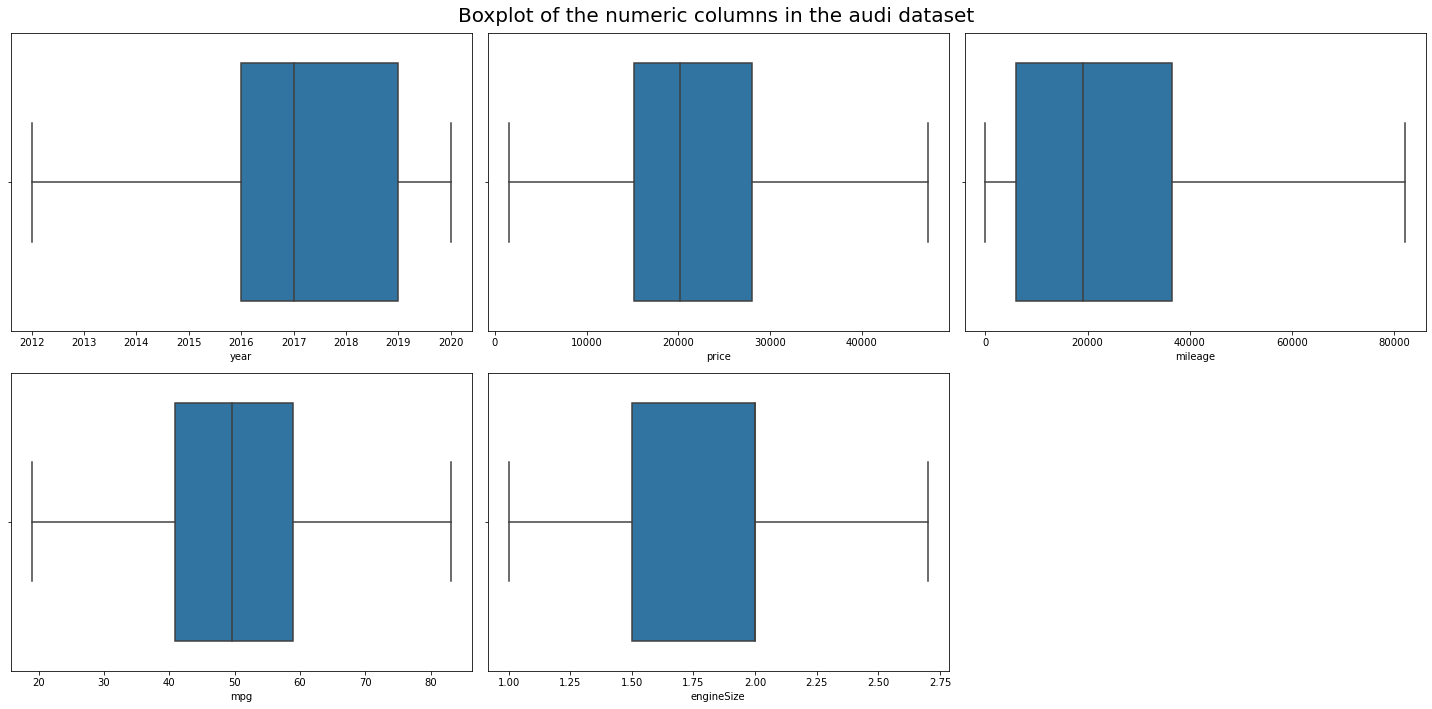

In [71]:
plt.figure(figsize=(20,10)) # width, height

for index in range(len(num_cols)):    
    plt.subplot(2,3,index+1)
    sns.boxplot(x=num_cols[index], data=df, showfliers=False)
    

plt.suptitle("Boxplot of the numeric columns in the audi dataset",fontsize=20)
plt.tight_layout()
plt.show()

#### For all numeric columns respective medians are, year: 2017, price: 22000, mileage: 24000, mpg: 50 and engine Size: 2

In [23]:
df.describe()

,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


In [24]:
df["fuelType"].value_counts()

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

Before adding a catagorical column as hue we check their value counts

#### Adding categorical feature(fuelType) as x-axis in the boxplot

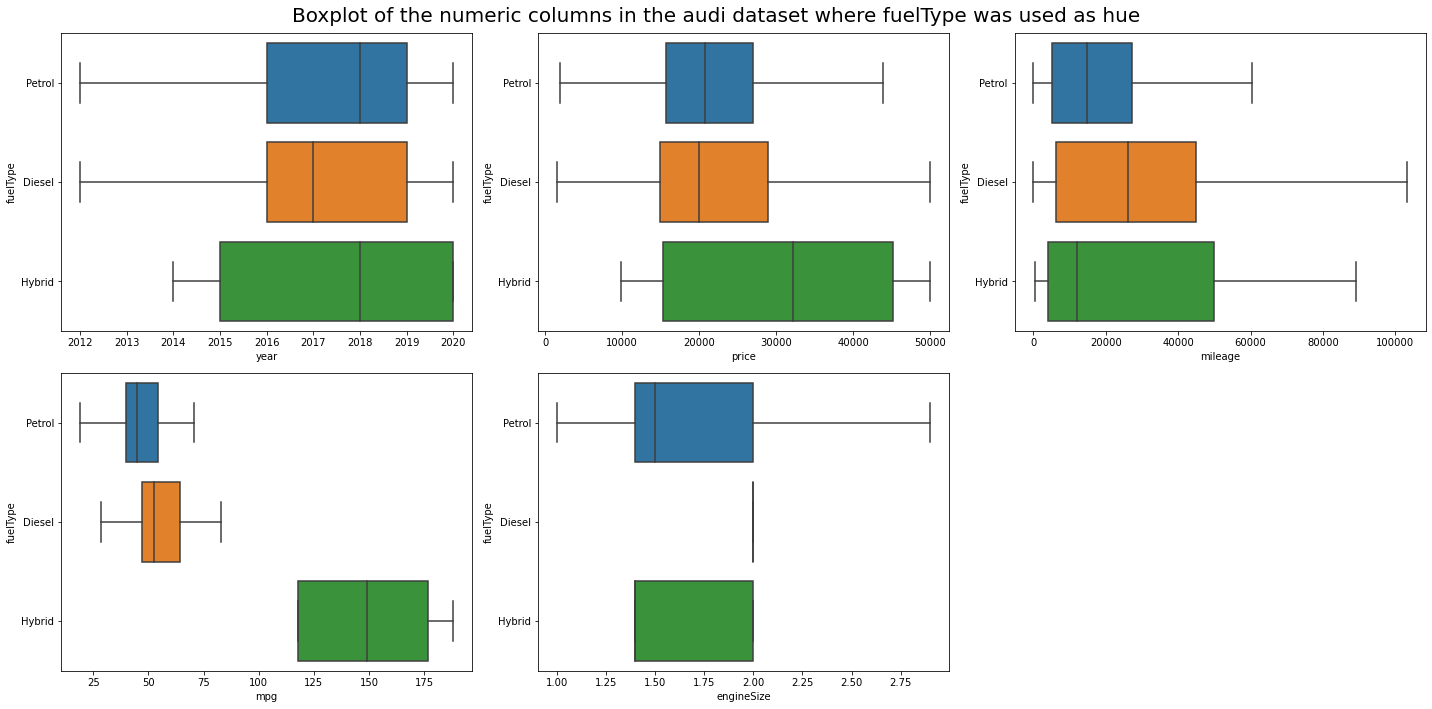

In [70]:
plt.figure(figsize=(20,10)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=num_cols[index], data=df, showfliers=False, y=df["fuelType"])

plt.suptitle("Boxplot of the numeric columns in the audi dataset where fuelType was used as hue",fontsize=20)
plt.tight_layout()
plt.show()

We can see, Hyprid fuel's cars are recent, that's why their range is 2014-2020. Hybrid car's lowest price is much higher than that of Petrol and Diesel Type cars. Petrol and Diesel type cars' mpg is much lower than that of Hybrid cars. For Diesel, engineSize is fixed in this dataset. 

### Here we can definitely conclude that the used hue parameter was important to distinguish the attributes based on fuelType.

# Violin Plot

#### Creating violinplots for numeric columns

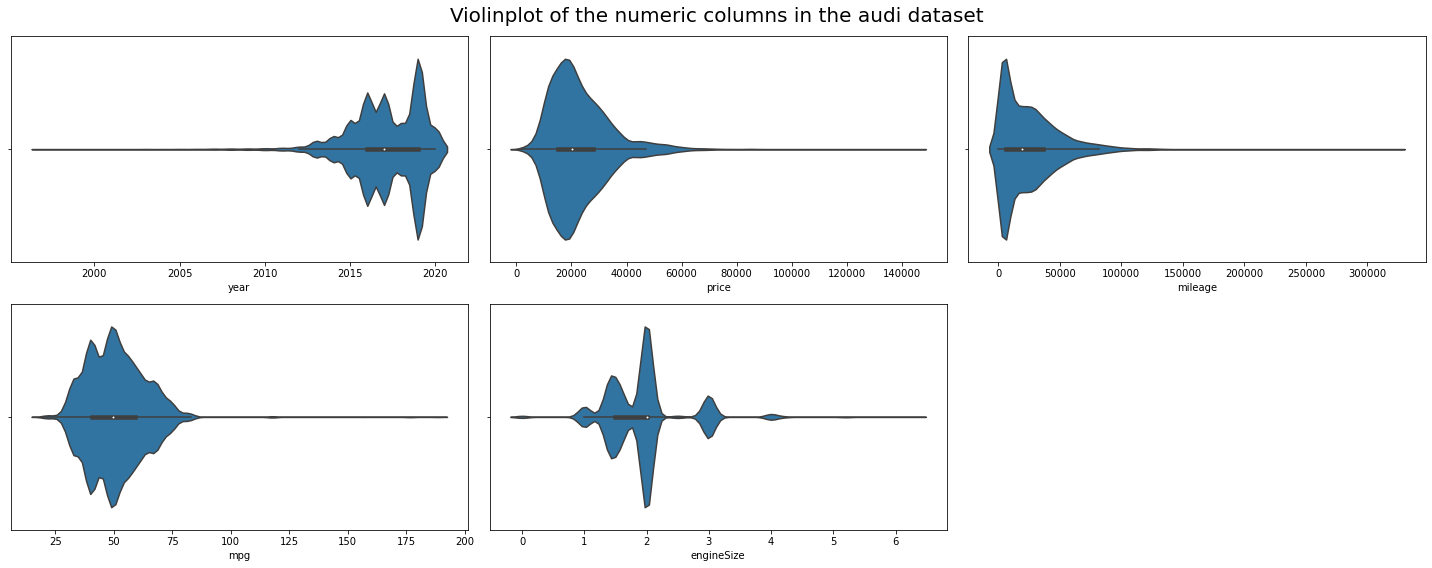

In [69]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(x=num_cols[index], data=df, showfliers=False)

plt.suptitle("Violinplot of the numeric columns in the audi dataset",fontsize=20)
plt.tight_layout()
plt.show()

Violinplot mainly focuses on density of each variable. Here the most stable variable was price. 

#### Adding Categorical Column(fuelType) as x-axis with the violin plot

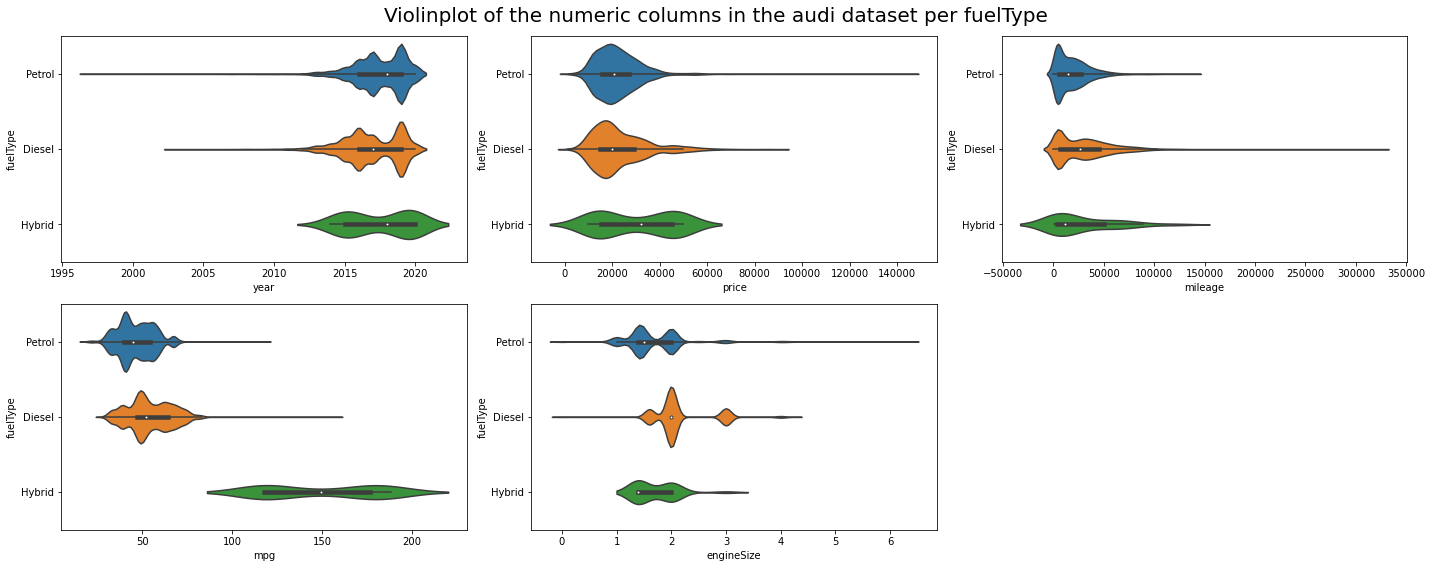

In [68]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(x=num_cols[index], data=df, showfliers=False,y = df["fuelType"])

plt.suptitle("Violinplot of the numeric columns in the audi dataset per fuelType",fontsize=20)
plt.tight_layout()
plt.show()

Here violinplot also shows the information we found during plotting boxplots, but the density of each variable was not there.

### If the density of variable is not important for a certain concept, I will definitely support the boxplot more than violinplot because I found boxplots simpler to understand. 

# Histogram

#### Histograms with count as y-axis and numerical attributes as x-axis

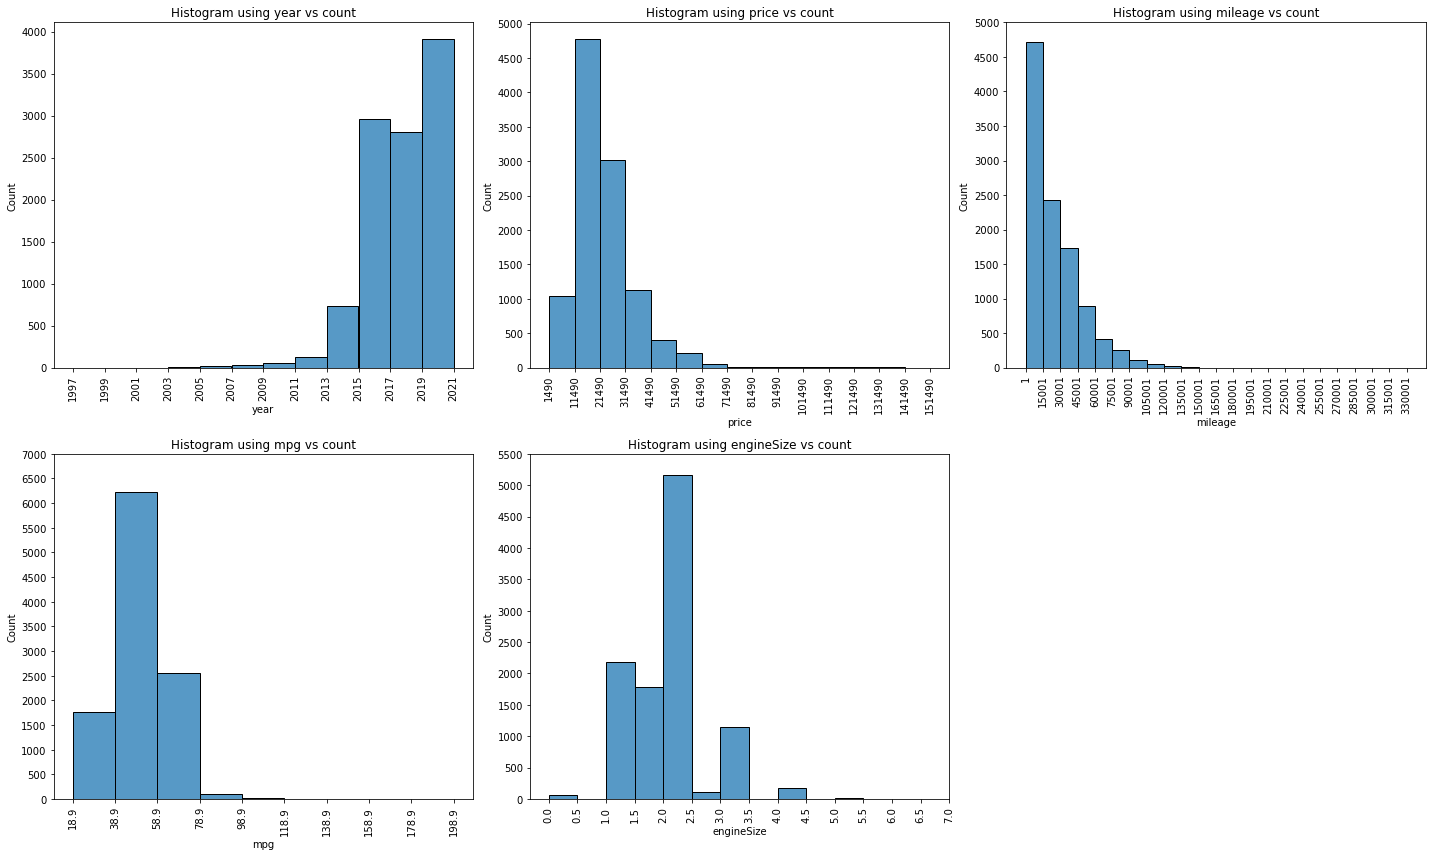

In [63]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.histplot(x="year", data=df,binwidth=2)
plt.xticks(np.arange(df["year"].min(),df["year"].max()+3,2),rotation=90) #totation is used to clearly show the label values.
plt.title("Histogram using year vs count")

plt.subplot(2,3,2)
sns.histplot(x="price", data=df,binwidth=10000)
plt.xticks(np.arange(df["price"].min(),df["price"].max()+10001,10000),rotation=90)
plt.yticks(np.arange(0,5500,500))
plt.title("Histogram using price vs count")

plt.subplot(2,3,3)
sns.histplot(x="mileage", data=df,binwidth=15000)
plt.xticks(np.arange(df["mileage"].min(),df["mileage"].max()+15001,15000),rotation=90)
plt.yticks(np.arange(0,5500,500))
plt.title("Histogram using mileage vs count")

plt.subplot(2,3,4)
sns.histplot(x="mpg", data=df,binwidth=20)
plt.xticks(np.arange(df["mpg"].min(),df["mpg"].max()+21,20),rotation=90)
plt.yticks(np.arange(0,7500,500))
plt.title("Histogram using mpg vs count")

plt.subplot(2,3,5)
sns.histplot(x="engineSize", data=df,binwidth=0.5)
plt.xticks(np.arange(df["engineSize"].min(),df["engineSize"].max()+1,0.5),rotation=90)
plt.yticks(np.arange(0,6000,500))
plt.title("Histogram using engineSize vs count")



plt.tight_layout()
plt.show()

First, we have to set a figure size. <br>Then we will call seaborn's histplot. <br>Binwidth means the bin of values emerged into it. <br>xticks specifies the range of x-values with specified intervals.
<br>yticks specifies the range of y-values with specified intervals.<br>Intervals are chosen relating with the range of values.

We can say that mileage vs count graph is positively skewed.

#### Histograms with probability as y-axis and numerical attributes as x-axis

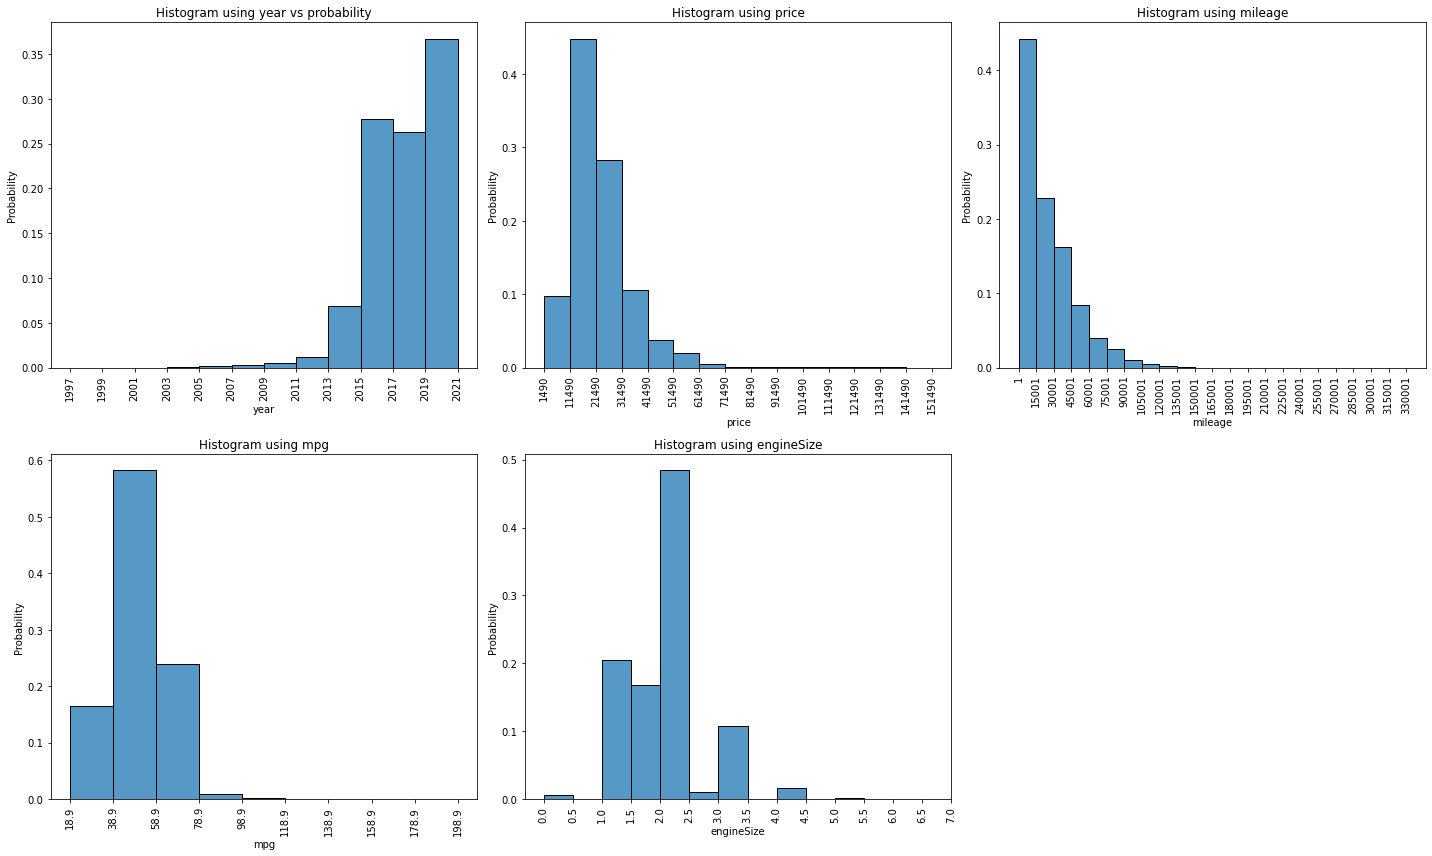

In [65]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.histplot(x="year", data=df,binwidth=2,stat="probability")
plt.xticks(np.arange(df["year"].min(),df["year"].max()+3,2),rotation=90) #totation is used to clearly show the label values.
plt.title("Histogram using year vs probability")

plt.subplot(2,3,2)
sns.histplot(x="price", data=df,binwidth=10000,stat="probability")
plt.xticks(np.arange(df["price"].min(),df["price"].max()+10001,10000),rotation=90)
plt.title("Histogram using price")

plt.subplot(2,3,3)
sns.histplot(x="mileage", data=df,binwidth=15000,stat="probability")
plt.xticks(np.arange(df["mileage"].min(),df["mileage"].max()+15001,15000),rotation=90)
plt.title("Histogram using mileage")

plt.subplot(2,3,4)
sns.histplot(x="mpg", data=df,binwidth=20,stat="probability")
plt.xticks(np.arange(df["mpg"].min(),df["mpg"].max()+21,20),rotation=90)
plt.title("Histogram using mpg")

plt.subplot(2,3,5)
sns.histplot(x="engineSize", data=df,binwidth=0.5,stat="probability")
plt.xticks(np.arange(df["engineSize"].min(),df["engineSize"].max()+1,0.5),rotation=90)
plt.title("Histogram using engineSize")



plt.tight_layout()
plt.show()

First, we have to set a figure size. <br>Then we will call seaborn's histplot. <br>Binwidth means the bin of values emerged into it. <br>xticks specifies the range of x-values with specified intervals.
<br>yticks specifies the range of y-values with specified intervals.<br>Intervals are chosen relating with the range of values.


We can say that the mileage vs probability graph is positively skewed.

#### Here, yticks values always remain between 0 to 1 as per probability definition.